# Time-Series Forecasting of Carbon Monoxide and Nitrogen Dioxide Levels

Build predictive models to forecast daily or hourly concentrations of **CO(GT)** and **NO₂(GT)** based on historical data.

In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/refs/heads/main/airquality.csv'
df = pd.read_csv(url)
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,2004-03-10,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,2004-03-10,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,2004-03-10,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,2004-03-10,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [3]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


In [5]:
df1= df.copy()
df2= df.copy()

In [6]:
df2.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,2005-04-04,10:00:00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
9353,2005-04-04,11:00:00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
9354,2005-04-04,12:00:00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406
9355,2005-04-04,13:00:00,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139
9356,2005-04-04,14:00:00,2.2,1071,-200,11.9,1047,265,654,168,1129,816,28.5,13.1,0.5028


In [7]:
correlation = df[['CO(GT)', 'NO2(GT)']].corr()
print(f'{correlation}')

           CO(GT)   NO2(GT)
CO(GT)   1.000000  0.671127
NO2(GT)  0.671127  1.000000


# Project Workflow

### **Deliverables**:
1. **Forecasting Models**:
   - Trained models for `CO(GT)` and `NO₂(GT)`.
2. **Forecast Visualization**:
   - Plots showing historical trends and future predictions.
3. **Evaluation Report**:
   - Metrics and comparison of different forecasting models.
4. **Insights and Recommendations**:
   - Suggestions for mitigating high levels of these gases based on predictions.


# 1. Data Preprocessing
- **Date-Time Parsing**:
  - Combine the `Date` and `Time` columns into a single `datetime` column.
  - Set the `datetime` column as the index of the dataset.
- **Resampling**:
  - Aggregate the data into meaningful time intervals (e.g., hourly or daily averages).
- **Handle Missing Values**:
  - Use interpolation, mean, or advanced imputation techniques to fill missing data for `CO(GT)` and `NO₂(GT)`.
- **Outlier Detection**:
  - Remove or cap extreme values in `CO(GT)` and `NO₂(GT)` using statistical thresholds.

In [8]:
import pandas as pd 
import prophet
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller #Augmented Dickey-Fuller (ADF) Test, which is a statistical test designed to check for stationarity in a time series.
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from prophet import Prophet
import numpy as np

import warnings 
warnings.simplefilter('ignore')

#### Date-Time Parsing

In [10]:
df[1:3]

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
1,2004-03-10,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,2004-03-10,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502


In [11]:
df['Year'] = df['Date'].apply(lambda x: str(x)[:4])  #lambda arguments : expression

In [12]:
df['Month'] = df['Date'].apply(lambda x: str(x)[5:7])  #lambda arguments : expression

In [13]:
df['Day'] = df['Date'].apply(lambda x: str(x)[8:10])  #lambda arguments : expression

In [14]:
df[1:3]

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day
1,2004-03-10,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,2004,03,10
2,2004-03-10,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,2004,03,10


In [15]:
#df.info()

In [16]:
df['Formated Date'] = pd.DatetimeIndex(df['Year']+'-'+df['Month']+'-'+df['Day'])

In [17]:
df[1:3]

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day,Formated Date
1,2004-03-10,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,2004,03,10,2004-03-10
2,2004-03-10,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,2004,03,10,2004-03-10


In [18]:
#df.info()

In [19]:
df['Hour'] = df['Time'].apply(lambda x: str(x)[:2])  #lambda arguments : expression

In [20]:
df['Mins'] = df['Time'].apply(lambda x: str(x)[3:5])  #lambda arguments : expression

In [21]:
df['Sec'] = df['Time'].apply(lambda x: str(x)[6:8])  #lambda arguments : expression

In [22]:
df[1:3]

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),...,T,RH,AH,Year,Month,Day,Formated Date,Hour,Mins,Sec
1,2004-03-10,19:00:00,2.0,1292,112,9.4,955,103,1174,92,...,13.3,47.7,0.7255,2004,03,10,2004-03-10,19,00,00
2,2004-03-10,20:00:00,2.2,1402,88,9.0,939,131,1140,114,...,11.9,54.0,0.7502,2004,03,10,2004-03-10,20,00,00


In [23]:
df['Formated Time'] = pd.to_datetime(df['Hour'].astype(str)+':'+df['Mins'].astype(str)+':'+df['Sec'].astype(str),format='%H:%M:%S',errors='coerce').dt.time

In [24]:
df[1:3]

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),...,RH,AH,Year,Month,Day,Formated Date,Hour,Mins,Sec,Formated Time
1,2004-03-10,19:00:00,2.0,1292,112,9.4,955,103,1174,92,...,47.7,0.7255,2004,03,10,2004-03-10,19,00,00,19:00:00
2,2004-03-10,20:00:00,2.2,1402,88,9.0,939,131,1140,114,...,54.0,0.7502,2004,03,10,2004-03-10,20,00,00,20:00:00


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   object        
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   int64         
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   int64         
 7   NOx(GT)        9357 non-null   int64         
 8   PT08.S3(NOx)   9357 non-null   int64         
 9   NO2(GT)        9357 non-null   int64         
 10  PT08.S4(NO2)   9357 non-null   int64         
 11  PT08.S5(O3)    9357 non-null   int64         
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
 15  Year           9357 n

In [26]:
df['Datetime'] = pd.to_datetime(
    df['Date'] + ' ' + df['Time'],
    format='%Y-%m-%d %H:%M:%S',  # Adjust format as needed
    errors='coerce'
)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   object        
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   int64         
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   int64         
 7   NOx(GT)        9357 non-null   int64         
 8   PT08.S3(NOx)   9357 non-null   int64         
 9   NO2(GT)        9357 non-null   int64         
 10  PT08.S4(NO2)   9357 non-null   int64         
 11  PT08.S5(O3)    9357 non-null   int64         
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
 15  Year           9357 n

In [28]:
df.shape

(9357, 24)

#### Set datetime column as index
- Setting the datetime column as index is prior condition to handle the negative or missing value in the time series data set

In [29]:
df.set_index('Datetime', inplace=True)

In [30]:
df[1:3]

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),...,RH,AH,Year,Month,Day,Formated Date,Hour,Mins,Sec,Formated Time
Datetime,,,,,,,,,,,,,,,,,,,,,
2004-03-10 19:00:00,2004-03-10,19:00:00,2.0,1292,112,9.4,955,103,1174,92,...,47.7,0.7255,2004,03,10,2004-03-10,19,00,00,19:00:00
2004-03-10 20:00:00,2004-03-10,20:00:00,2.2,1402,88,9.0,939,131,1140,114,...,54.0,0.7502,2004,03,10,2004-03-10,20,00,00,20:00:00


In [31]:
df3 = df.copy()

In [32]:
df.sort_index(inplace=True) # To sort the index chronologically

In [33]:
df[1:4]

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),...,RH,AH,Year,Month,Day,Formated Date,Hour,Mins,Sec,Formated Time
Datetime,,,,,,,,,,,,,,,,,,,,,
2004-03-10 19:00:00,2004-03-10,19:00:00,2.0,1292,112,9.4,955,103,1174,92,...,47.7,0.7255,2004,03,10,2004-03-10,19,00,00,19:00:00
2004-03-10 20:00:00,2004-03-10,20:00:00,2.2,1402,88,9.0,939,131,1140,114,...,54.0,0.7502,2004,03,10,2004-03-10,20,00,00,20:00:00
2004-03-10 21:00:00,2004-03-10,21:00:00,2.2,1376,80,9.2,948,172,1092,122,...,60.0,0.7867,2004,03,10,2004-03-10,21,00,00,21:00:00


In [34]:
df.drop(['Date', 'Time','Year', 'Month', 'Day', 'Formated Date','Hour','Mins','Sec','Formated Time'], axis=1, inplace=True)

In [35]:
df.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

### Handling missing value 

In [38]:
df['CO(GT)'].value_counts().head() # for Time-series data the value -200 means missing value and considered as nan.

CO(GT)
-200.0    1683
 1.0       305
 1.4       279
 1.6       275
 1.5       273
Name: count, dtype: int64

In [39]:
df['NO2(GT)'].value_counts().head()

NO2(GT)
-200    1642
 97       78
 117      77
 119      77
 95       75
Name: count, dtype: int64

In [40]:
# Replacing -200 or missing value from the target columns
df['CO(GT)'] = df['CO(GT)'].replace(-200, np.nan) # replacing for CO

In [41]:
df['NO2(GT)'] = df['NO2(GT)'].replace(-200, np.nan) # replacing for NO2

In [43]:
df['CO(GT)'].value_counts().head() # after replacement

CO(GT)
1.0    305
1.4    279
1.6    275
1.5    273
1.1    262
Name: count, dtype: int64

### Time-based interpolation (best for time series)
- Interpolation in time series missing value handling is a technique that estimates missing values by using surrounding known data points to create a plausible estimate that maintains the temporal pattern.

In [44]:
df['CO(GT)'] = df['CO(GT)'].interpolate(method='time')

In [45]:
df['NO2(GT)'] = df['NO2(GT)'].interpolate(method='time')

<Axes: title={'center': 'Raw CO(GT)'}>

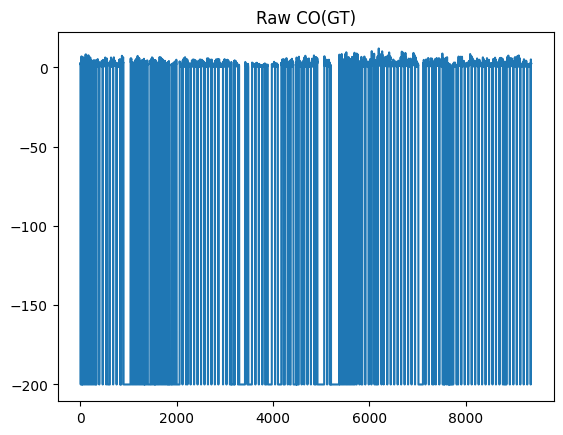

In [48]:
df1['CO(GT)'].plot(title="Raw CO(GT)") # Before handling missing value and interpolation 

<Axes: title={'center': 'Cleaned CO(GT)'}, xlabel='Datetime'>

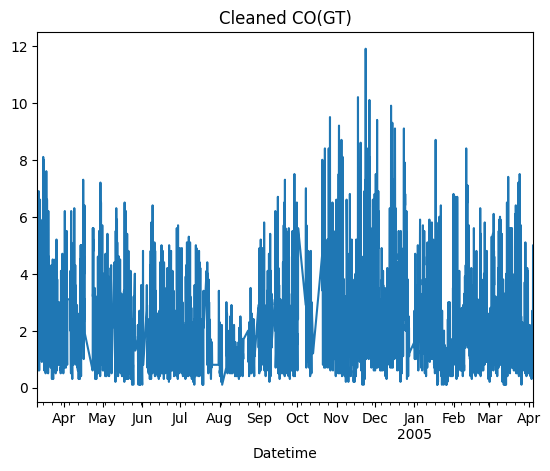

In [47]:
df['CO(GT)'].replace(-200, np.nan).interpolate().plot(
    title="Cleaned CO(GT)"
)  # after interpolation

### Check for outliers

In [63]:
# Define target and feature columns
target_cols = ['CO(GT)', 'NO2(GT)']

feature_cols = [
    'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
    'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)',
    'PT08.S4(NO2)', 'PT08.S5(O3)',
    'T', 'RH', 'AH'
]

In [64]:
# Reensure that datetime column is set as index
df.index = pd.to_datetime(df.index)
df = df.sort_index()

In [65]:
# Detect outliers using IQR because Common in air-quality studies and No distribution assumption
def detect_outliers_iqr(series, factor=1.5):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - factor * IQR
    upper = Q3 + factor * IQR

    return (series < lower) | (series > upper)

In [66]:
# Replace outliers with NaN
df_clean = df.copy()

for col in feature_cols:
    outliers = detect_outliers_iqr(df_clean[col])
    df_clean.loc[outliers, col] = np.nan

In [70]:
# Interpolate missing values (time-aware)
df_clean[feature_cols] = df_clean[feature_cols].interpolate(method='time')

In [73]:
# Checking number of handled outliers. # If the outcome is zero for all columns that means the outiliers are removed and interpolated
outlier_summary = {}

for col in feature_cols:
    outlier_summary[col] = df[col].isna().sum()

pd.Series(outlier_summary).sort_values(ascending=False)

PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [74]:
df_clean[feature_cols].isna().sum() # If the outcome is zero for all columns that means the outiliers are removed and interpolated

PT08.S1(CO)       0
NMHC(GT)         39
C6H6(GT)          0
PT08.S2(NMHC)     0
NOx(GT)           0
PT08.S3(NOx)      0
PT08.S4(NO2)      0
PT08.S5(O3)       0
T                 0
RH                0
AH                0
dtype: int64

In [76]:
# Before outlier handling 
df[feature_cols].describe()

,PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [78]:
# After outlier handling
df_clean[feature_cols].describe()

,PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9318.0,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,1099.928396,-200.0,9.822085,939.636155,148.968633,823.090307,1449.462381,1028.592337,18.233120,49.191386,1.019591
std,210.158467,0.0,6.579168,261.537108,215.994949,228.422840,333.782061,394.965716,8.780952,17.194506,0.402123
min,647.000000,-200.0,0.100000,383.000000,-200.000000,322.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,938.000000,-200.0,4.500000,736.000000,50.000000,654.000000,1227.000000,733.000000,11.700000,35.800000,0.732300
50%,1067.000000,-200.0,8.300000,910.012987,140.000000,804.000000,1460.000000,970.000000,17.600000,49.600000,0.989500
75%,1239.000000,-200.0,14.100000,1119.000000,281.000000,967.000000,1668.000000,1293.000000,24.300000,62.300000,1.306700
max,1669.000000,-200.0,28.000000,1696.000000,635.000000,1442.000000,2376.000000,2087.000000,43.400000,88.700000,2.180600


<Axes: title={'center': 'Before cleaning'}, xlabel='Datetime'>

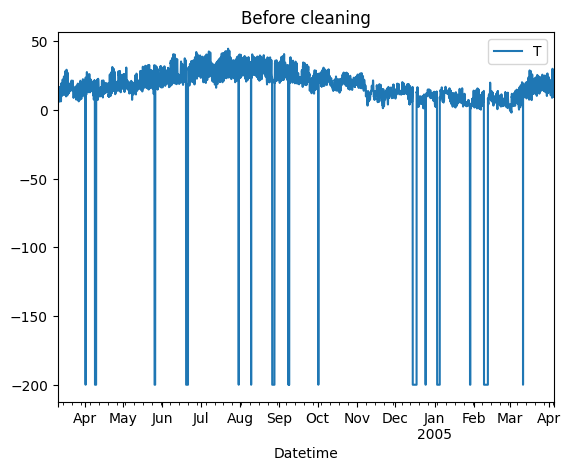

In [80]:
df[['T']].plot(title='Before cleaning')

<Axes: title={'center': 'After cleaning'}, xlabel='Datetime'>

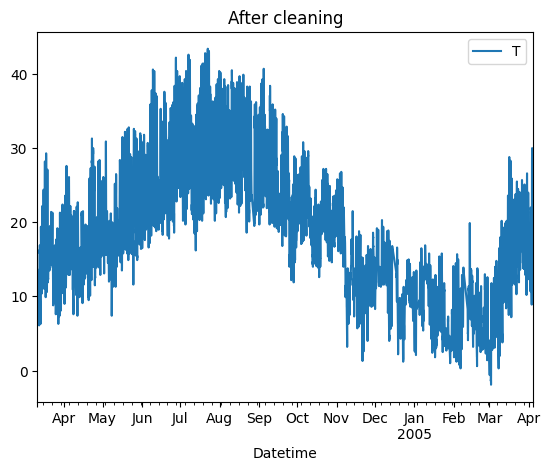

In [81]:
df_clean[['T']].plot(title='After cleaning')

# 2. Exploratory Data Analysis (EDA)
- **Trend Analysis**:
  - Visualize the long-term trends of `CO(GT)` and `NO₂(GT)`.
- **Seasonality**:
  - Identify seasonal patterns (e.g., daily or yearly fluctuations).
- **Correlation Analysis**:
  - Explore relationships between `CO(GT)`, `NO₂(GT)`, and other features (e.g., temperature or humidity).


In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

### Resample to daily mean

In [83]:
daily_trend = df[["CO(GT)", "NO2(GT)"]].resample("D").mean()
#print(f'daily trend; {daily_trend}')

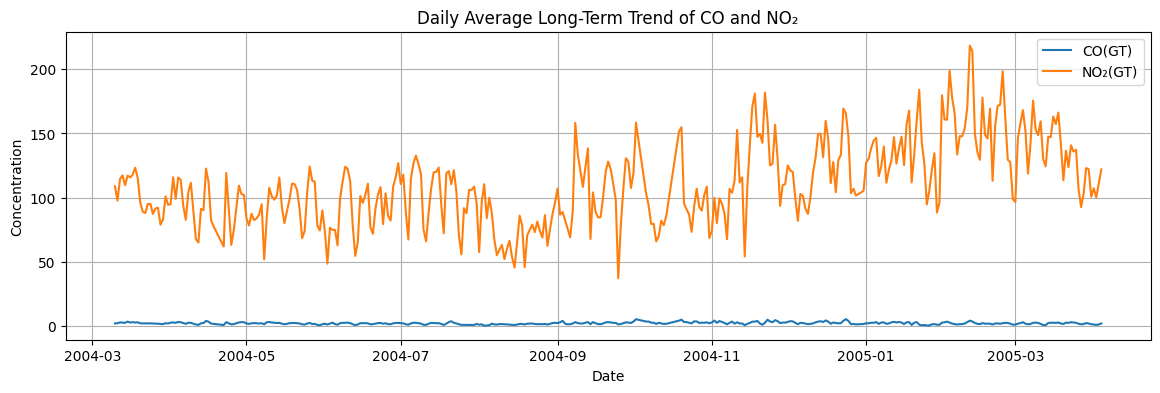

In [84]:
plt.figure(figsize=(14, 4))

plt.plot(daily_trend.index, daily_trend["CO(GT)"], label="CO(GT)")
plt.plot(daily_trend.index, daily_trend["NO2(GT)"], label="NO₂(GT)")

plt.title("Daily Average Long-Term Trend of CO and NO₂")
plt.xlabel("Date")
plt.ylabel("Concentration")
plt.legend()
plt.grid(True)
plt.show()

### Resample to monthly mean

In [85]:
monthly_trend = df[["CO(GT)", "NO2(GT)"]].resample("M").mean()

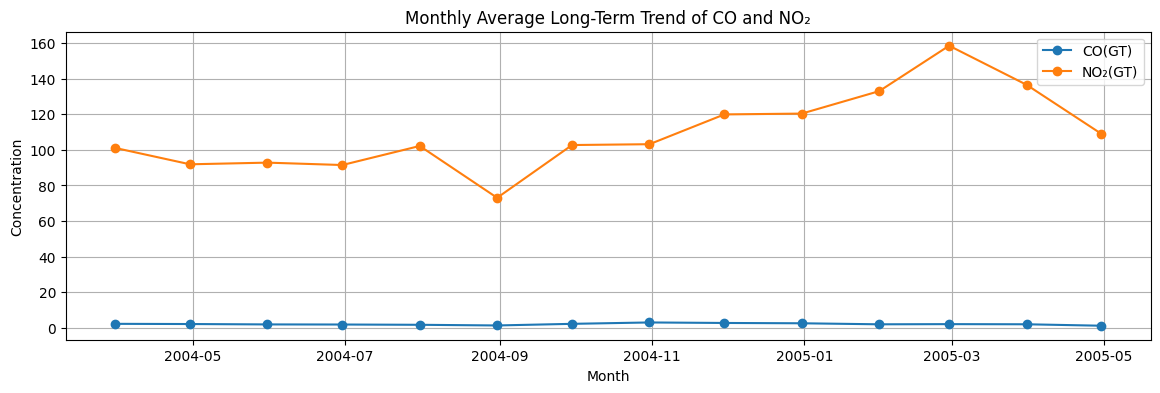

In [86]:
plt.figure(figsize=(14, 4))

plt.plot(monthly_trend.index, monthly_trend["CO(GT)"], marker="o", label="CO(GT)")
plt.plot(monthly_trend.index, monthly_trend["NO2(GT)"], marker="o", label="NO₂(GT)")

plt.title("Monthly Average Long-Term Trend of CO and NO₂")
plt.xlabel("Month")
plt.ylabel("Concentration")
plt.legend()
plt.grid(True)
plt.show()

### Resample to yearly mean

In [87]:
yearly_trend = df[["CO(GT)", "NO2(GT)"]].resample("Y").mean()

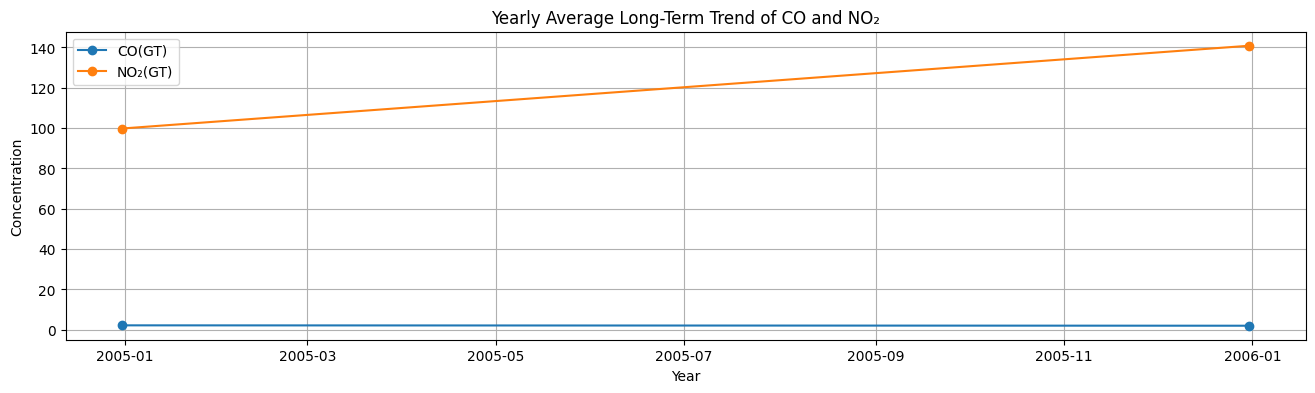

In [88]:
plt.figure(figsize=(16, 4))

plt.plot(yearly_trend.index, yearly_trend["CO(GT)"], marker="o", label="CO(GT)")
plt.plot(yearly_trend.index, yearly_trend["NO2(GT)"], marker="o", label="NO₂(GT)")

plt.title("Yearly Average Long-Term Trend of CO and NO₂")
plt.xlabel("Year")
plt.ylabel("Concentration")
plt.legend()
plt.grid(True)
plt.show()

### Correlation analysis

In [89]:
df.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

In [90]:
# Selecting the relevant columns for correaltion analysis
corr_features = [
    "CO(GT)",
    "PT08.S1(CO)",
    "NO2(GT)",
    "PT08.S4(NO2)",
    "T",
    "RH",
    "AH"
]
corr_df = df[corr_features]
corr_df.head()

,CO(GT),PT08.S1(CO),NO2(GT),PT08.S4(NO2),T,RH,AH
Datetime,,,,,,,
2004-03-10 18:00:00,2.6,1360,113.0,1692,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292,92.0,1559,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402,114.0,1555,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376,122.0,1584,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272,116.0,1490,11.2,59.6,0.7888


In [91]:
#calculating pearson correlation matrix
correlation_matrix = corr_df.corr()
print(correlation_matrix)

                CO(GT)  PT08.S1(CO)   NO2(GT)  PT08.S4(NO2)         T  \
CO(GT)        1.000000     0.444400  0.675804      0.351890 -0.069412   
PT08.S1(CO)   0.444400     1.000000  0.304136      0.845149  0.754844   
NO2(GT)       0.675804     0.304136  1.000000      0.031608 -0.139831   
PT08.S4(NO2)  0.351890     0.845149  0.031608      1.000000  0.755060   
T            -0.069412     0.754844 -0.139831      0.755060  1.000000   
RH           -0.054169     0.745375 -0.127013      0.640707  0.885911   
AH           -0.076638     0.764903 -0.110087      0.691913  0.981001   

                    RH        AH  
CO(GT)       -0.054169 -0.076638  
PT08.S1(CO)   0.745375  0.764903  
NO2(GT)      -0.127013 -0.110087  
PT08.S4(NO2)  0.640707  0.691913  
T             0.885911  0.981001  
RH            1.000000  0.943995  
AH            0.943995  1.000000  


In [92]:
# To see the correlation for whole data set
correlation_matrix_all = df.corr()
print(correlation_matrix_all)

                 CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
CO(GT)         1.000000     0.444400  0.150434  0.066728       0.559786   
PT08.S1(CO)    0.444400     1.000000  0.170007  0.852687       0.933102   
NMHC(GT)       0.150434     0.170007  1.000000  0.037323       0.110104   
C6H6(GT)       0.066728     0.852687  0.037323  1.000000       0.767433   
PT08.S2(NMHC)  0.559786     0.933102  0.110104  0.767433       1.000000   
NOx(GT)        0.562573     0.277993 -0.004427 -0.001174       0.331272   
PT08.S3(NOx)  -0.543885     0.087019  0.048821  0.512193      -0.073667   
NO2(GT)        0.675804     0.304136 -0.002019 -0.006401       0.382365   
PT08.S4(NO2)   0.351890     0.845149  0.162680  0.774673       0.874782   
PT08.S5(O3)    0.611742     0.892434  0.101185  0.641334       0.909905   
T             -0.069412     0.754844 -0.000009  0.971375       0.669025   
RH            -0.054169     0.745375  0.008284  0.925062       0.585803   
AH            -0.076638  

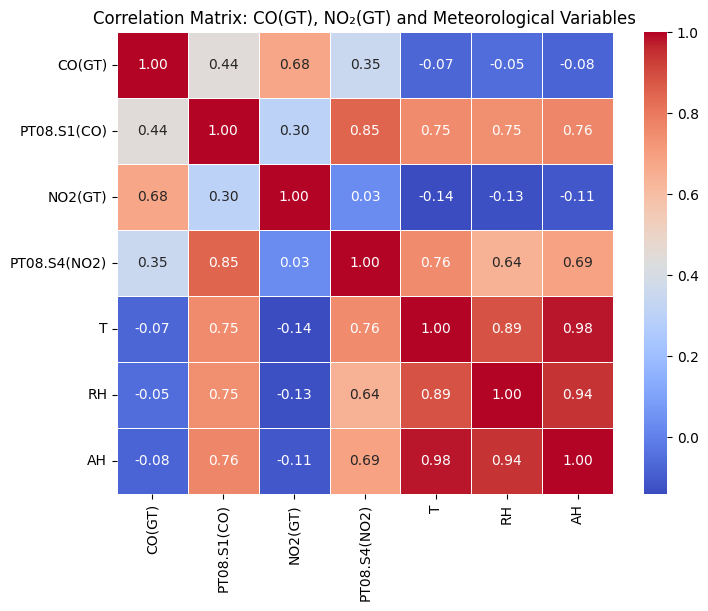

In [93]:
plt.figure(figsize=(8, 6))

sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)

plt.title("Correlation Matrix: CO(GT), NO₂(GT) and Meteorological Variables")
plt.show()

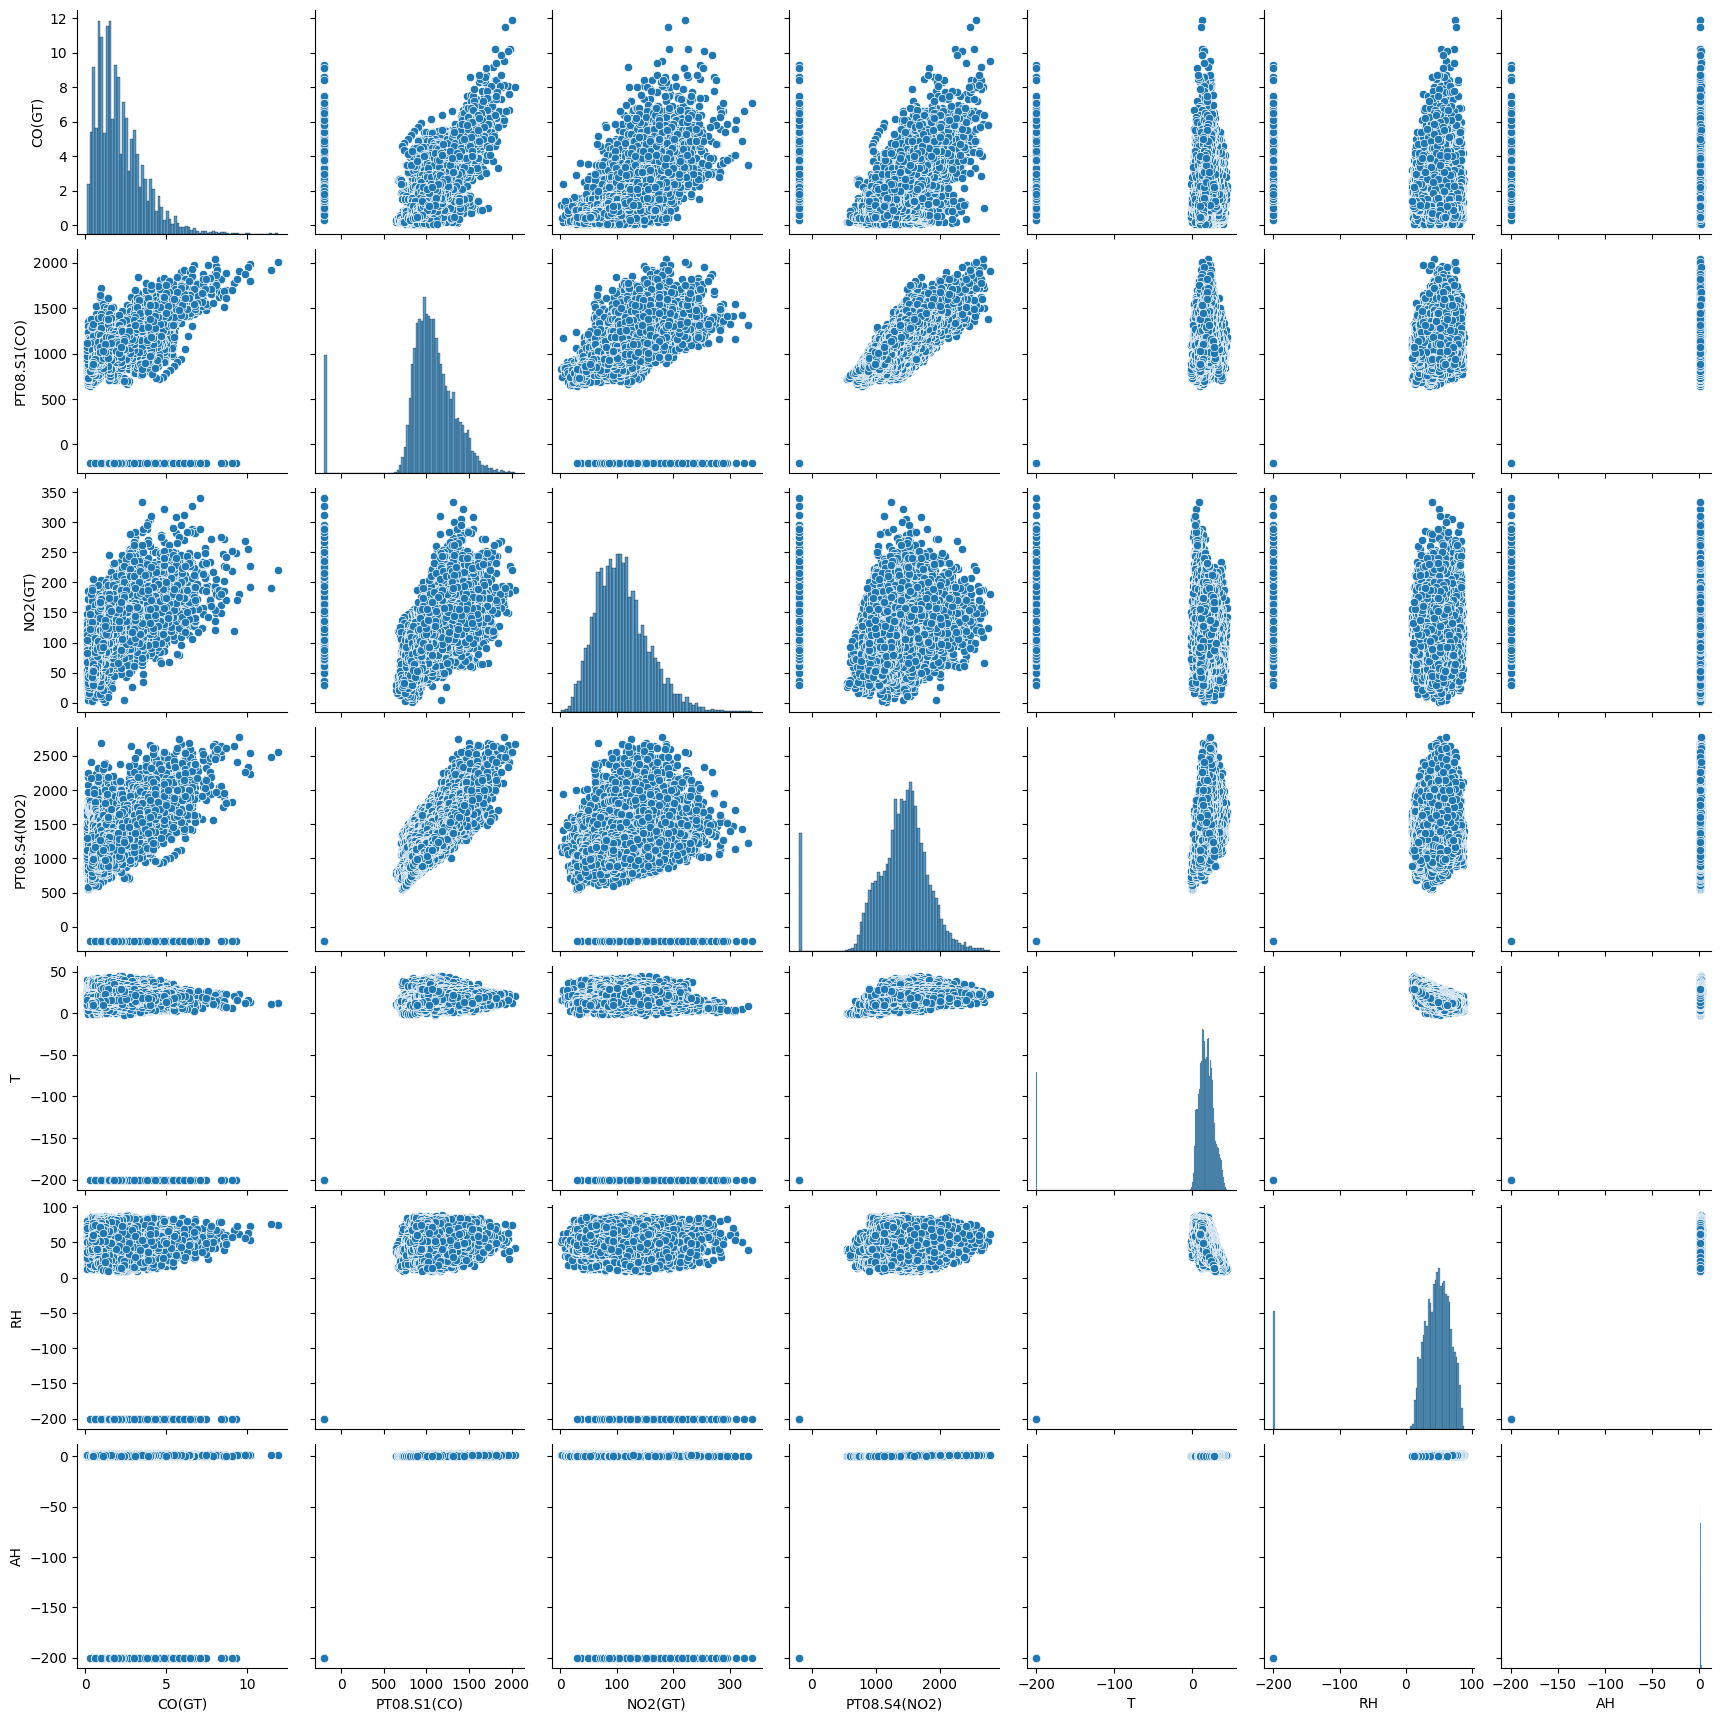

In [94]:
sns.pairplot(corr_df)
plt.show()

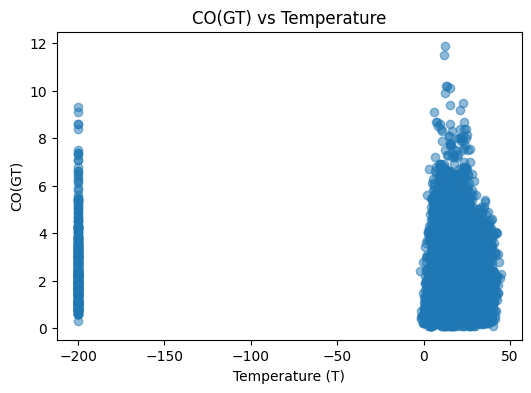

In [95]:
# CO v Temperature
plt.figure(figsize=(6, 4))
plt.scatter(df["T"], df["CO(GT)"], alpha=0.5)
plt.xlabel("Temperature (T)")
plt.ylabel("CO(GT)")
plt.title("CO(GT) vs Temperature")
plt.show()


# 3. Feature Engineering
- Create lag features for `CO(GT)` and `NO₂(GT)` to incorporate historical values.
- Add time-based features (e.g., hour of the day, day of the week, month).
- Include environmental factors (`T`, `RH`, `AH`) as predictors.


### Create Lag Features

In [96]:
# CO lags
df["CO_lag_1"] = df["CO(GT)"].shift(1)
df["CO_lag_24"] = df["CO(GT)"].shift(24)

# NO2 lags
df["NO2_lag_1"] = df["NO2(GT)"].shift(1)
df["NO2_lag_24"] = df["NO2(GT)"].shift(24)

In [97]:
# Drop NaNs Created by Lags
df.dropna(inplace=True)
print(df.shape)

(9333, 17)


In [98]:
df3.shape # originial data shape

(9357, 23)

### Adding time based features in the data set when the datetime column is transferred to index

In [99]:
# Extract time features when datetime column is set as index
df["hour"] = df.index.hour
df["day"] = df.index.day
df["month"] = df.index.month
df["dayofweek"] = df.index.dayofweek  # Monday=0, Sunday=6

In [100]:
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),...,RH,AH,CO_lag_1,CO_lag_24,NO2_lag_1,NO2_lag_24,hour,day,month,dayofweek
Datetime,,,,,,,,,,,,,,,,,,,,,
2004-03-11 18:00:00,4.8,1581,307,20.8,1319,281,799,151.0,2083,1409,...,64.2,0.8065,2.9,2.6,135.0,113.0,18,11,3,3
2004-03-11 19:00:00,6.9,1776,461,27.4,1488,383,702,172.0,2333,1704,...,69.3,0.8319,4.8,2.0,151.0,92.0,19,11,3,3
2004-03-11 20:00:00,6.1,1640,401,24.0,1404,351,743,165.0,2191,1654,...,67.8,0.8133,6.9,2.2,172.0,114.0,20,11,3,3
2004-03-11 21:00:00,3.9,1313,197,12.8,1076,240,957,136.0,1707,1285,...,64.0,0.7419,6.1,2.2,165.0,122.0,21,11,3,3
2004-03-11 22:00:00,1.5,965,61,4.7,749,94,1325,85.0,1333,821,...,63.4,0.6905,3.9,1.6,136.0,116.0,22,11,3,3


### Define Features & Targets

In [101]:
df.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH', 'CO_lag_1', 'CO_lag_24', 'NO2_lag_1', 'NO2_lag_24',
       'hour', 'day', 'month', 'dayofweek'],
      dtype='object')

In [102]:
# selection of potential columns for features 
features = [
    "hour", "day", "month", "dayofweek", "CO_lag_1", "CO_lag_24","NO2_lag_1", "NO2_lag_24", "C6H6(GT)","PT08.S5(O3)",
    "T", "RH", "AH"
]

In [103]:
x = df[features]

y_co = df["CO(GT)"]
y_no2 = df["NO2(GT)"]

### Time-Based Train-Test Split

In [104]:
split_ratio = 0.8
split_index = int(len(df) * split_ratio) # len(df) → Counts total rows; * split_ratio → Takes 80% of total (where split_ratio = 0.8; e.g., 1000 × 0.8 = 800)

x_train, x_test = x.iloc[:split_index], x.iloc[split_index:] # x.iloc[:800] → Takes first 800 rows for training; # X.iloc[800:] → Takes remaining 200 rows for testing
y_co_train, y_co_test = y_co.iloc[:split_index], y_co.iloc[split_index:] 
y_no2_train, y_no2_test = y_no2.iloc[:split_index], y_no2.iloc[split_index:]

### Feature scaling 

In [105]:
from sklearn.preprocessing import StandardScaler

In [106]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# 4. Time-Series Forecasting
- Train separate models for **CO(GT)** and **NO₂(GT)**.
- Explore the following forecasting approaches:
  - **Statistical Models**:
    - Classical models like ARIMA or SARIMA for univariate forecasting.
  - **Machine Learning Models**:
    - Use regression models trained on lag features and external predictors.
  - **Deep Learning Models**:
    - Apply LSTM, GRU, or other RNN-based models for sequence forecasting.
- Evaluate and compare the models.


In [107]:
from sklearn.linear_model import LinearRegression
# Random Forest for Regression
from sklearn.ensemble import RandomForestRegressor
# Random Forest for Classification
from sklearn.ensemble import RandomForestClassifier
# ARIMA/SARIMA models
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Time series analysis tools
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller  # Augmented Dickey-Fuller test
from statsmodels.tsa.seasonal import seasonal_decompose
# Model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
# Warnings (optional)
import warnings
warnings.filterwarnings('ignore')  # Suppress convergence warnings

## Machine Learning Model (Random Forest Regression)

In [108]:
rf_co = RandomForestRegressor(random_state=42)
rf_no2 = RandomForestRegressor(random_state=42)

In [109]:
rf_co.fit(x_train_scaled, y_co_train)

RandomForestRegressor(random_state=42)

In [110]:
rf_co_pred = rf_co.predict(x_test_scaled)
print(rf_co_pred[:20]) #last 20 values

[2.293      2.25005771 1.32524512 1.46676289 1.29708216 1.21605019
 1.09310087 0.90072165 0.56562369 0.66946364 0.56466667 0.936
 2.59399902 3.58385714 3.35216364 3.28874138 3.18528125 2.99824772
 3.158      3.37360714]


In [111]:
rf_no2.fit(x_train_scaled, y_no2_train)

RandomForestRegressor(random_state=42)

In [112]:
rf_no2_pred = rf_no2.predict(x_test_scaled)

print(rf_no2_pred[:20]) #checking last 20 values

[157.80461538 156.92907675 141.97798851 127.92850575 152.48648851
 135.69949967 106.31031107  93.2388677   76.40716641  75.35591837
  86.36679929  94.595      130.43942952 181.89564516 191.56
 178.03056926 188.3        165.60927894 163.21734345 187.85612903]


In [114]:
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print(f"{model_name}")
    print(f"MAE : {mae:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"R²  : {r2:.3f}")
    print(f"MAPE  : {mape:.3f}")
    
    print("-" * 30)

In [115]:
# Random Forest
evaluate_model(y_co_test, rf_co_pred, "Random Forest - CO")
evaluate_model(y_no2_test, rf_no2_pred, "Random Forest - NO2")

Random Forest - CO
MAE : 0.298
RMSE: 0.468
R²  : 0.885
MAPE  : 26.861
------------------------------
Random Forest - NO2
MAE : 16.833
RMSE: 23.355
R²  : 0.813
MAPE  : 11.984
------------------------------


### Comments on random forest model evaluation
- MAPE (Mean Absolute Percentage Error)
- R2 ( Coefficient of determination)
#### For CO
- For prediction of CO concentration, the model can explain  88.5% of variance which is very good.
- As RMSE is almost near MAE which indicates outliers in the data set are well handled.
- Random forest model can reliably predict the CO concentration in real time.
#### For NO2
- As the R2 value is 0.813 therefore, the model can explain about 81.3% variance which is quite good.
- As the RMSE is almost similar to MSE which indicates the absence of outliers.
- For prediction of NO2 concentration the Random forest model learned better 

### Visualization of (Actual vs Predicted)

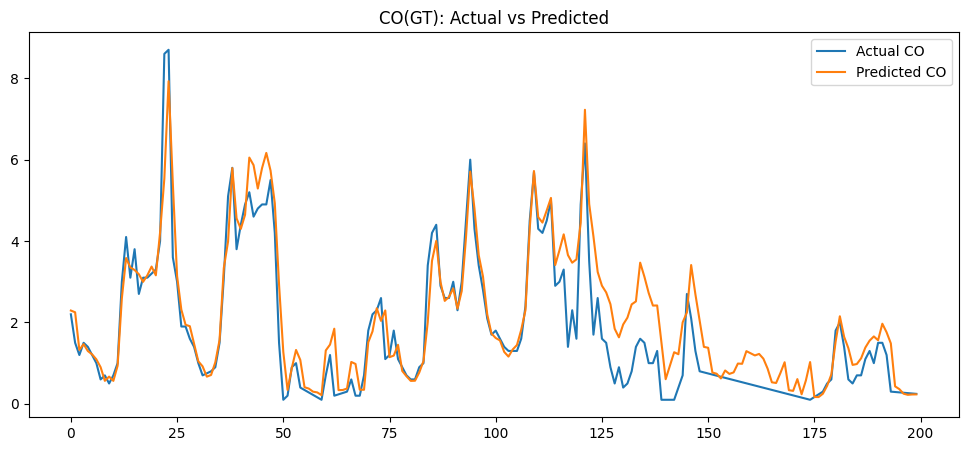

In [116]:
plt.figure(figsize=(12, 5))
plt.plot(y_co_test.values[:200], label="Actual CO")
plt.plot(rf_co_pred[:200], label="Predicted CO")
plt.title("CO(GT): Actual vs Predicted")
plt.legend()
plt.show()

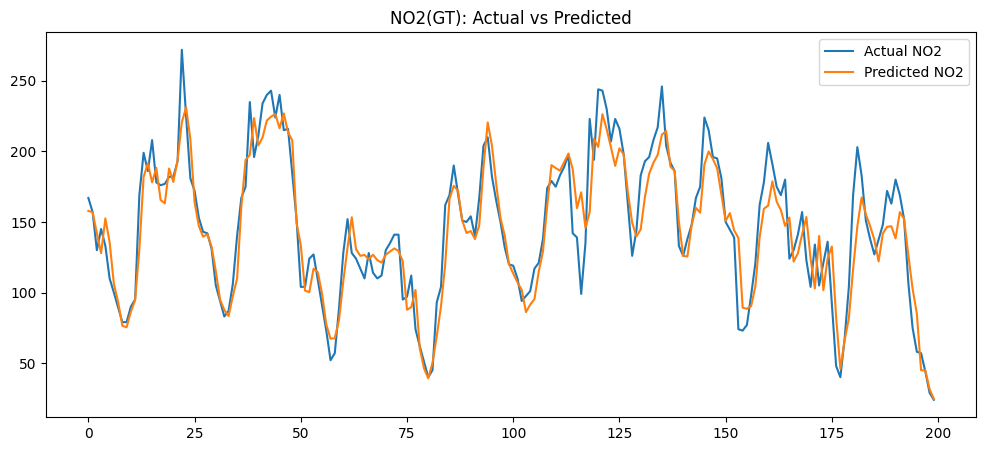

In [117]:
plt.figure(figsize=(12, 5))
plt.plot(y_no2_test.values[:200], label="Actual NO2")
plt.plot(rf_no2_pred[:200], label="Predicted NO2")
plt.title("NO2(GT): Actual vs Predicted")
plt.legend()
plt.show()

In [118]:
latest_data = x.iloc[-1:].copy() # Extracts the most recent data point from the dataset # .iloc[] - Stands for "integer location". 
                                    #It's a way to select data by its position (row number) rather than by labels.
                                    #[-1:] means "from the last row to the end" (which is just the last row)
next_co = rf_co.predict(latest_data) # Uses the trained machine learning model to make a prediction based on that most recent data
next_no2 = rf_no2.predict(latest_data)

print("Next Hour Prediction")
print("CO(GT):", next_co[0])
print("NO2(GT):", next_no2[0])

Next Hour Prediction
CO(GT): 9.792622377622383
NO2(GT): 231.24


## Statistical Model (ARIMA)

In ARIMA models, differencing is a technique used to transform a non-stationary time series into a stationary one by calculating the difference between consecutive data points. 

#### Perform ADF test

A time series is `stationary` if its statistical properties (mean, variance, autocorrelation) do not change over time. ARIMA models assume stationarity. If your series is not stationary, the model may produce `misleading results`.

#### Why Use the ADF Test?
The ADF Test helps you determine whether a time series is stationary by testing the null hypothesis: <br>

`Null Hypothesis (H₀):` The series has a unit root → it is non-stationary <br>
`Alternative Hypothesis (H₁):` The time series is stationary. <br>
`p-value:` If the p-value is less than 0.05 (p ≤ 0.05), you reject the null hypothesis, meaning the series is `stationary`.

#### For CO(GT)

In [119]:
result = adfuller(df['CO(GT)'])
print(f'{result}')
print("ADF Statistic:", result[0])
print("p-value:", result[1])

(np.float64(-9.847613109595823), np.float64(4.575050133578312e-17), 37, 9295, {'1%': np.float64(-3.4310537231669236), '5%': np.float64(-2.861851001180975), '10%': np.float64(-2.5669355408505097)}, np.float64(17020.08255592976))
ADF Statistic: -9.847613109595823
p-value: 4.575050133578312e-17


In [120]:
# Index:  Value
#result[0]  # ADF test statistic (the most important one)
#result[1]  # p-value
#result[2]  # Number of lags used
#result[3]  # Number of observations used
#result[4]  # Critical values (dictionary with 1%, 5%, 10% thresholds)

In [121]:
result[1]

np.float64(4.575050133578312e-17)

In [122]:
# As the p-value is less than the 0.05 therefore this time series is in stationary form.  
if result[1] > 0.05:
    print("The series is not stationary. Differencing will be applied.")
    df['CO(GT)_Diff'] = df['CO(GT)'].diff().dropna()
else:
    print("The series is stationary. Proceeding without differencing.")

The series is stationary. Proceeding without differencing.


#### For NO2(GT)

In [123]:
result_no = adfuller(df['NO2(GT)'])
print(f'{result_no}')
print("ADF Statistic:", result_no[0])
print("p-value:", result_no[1])

(np.float64(-7.90356942090914), np.float64(4.123275486991236e-12), 27, 9305, {'1%': np.float64(-3.431052966673162), '5%': np.float64(-2.8618506668980794), '10%': np.float64(-2.5669353629103395)}, np.float64(78084.63688160243))
ADF Statistic: -7.90356942090914
p-value: 4.123275486991236e-12


In [124]:
# As the p-value is less than the 0.05 therefore this time series is in stationary form.  
if result_no[1] > 0.05:
    print("The series is not stationary. Differencing will be applied.")
    df['NO2(GT)_Diff'] = df['NO2(GT)'].diff().dropna()
else:
    print("The series is stationary. Proceeding without differencing.")

The series is stationary. Proceeding without differencing.


## Define ARIMA parameters (p, d, q)

In [125]:
df = df.asfreq('H')  # Assign a hourly frequency
print(df.index.freq)  # Should show 'H' for hourly data, also alailable, D, W, Y

<Hour>


In [126]:
# Check data type
print(type(x_train))
#print(x_train.head())

<class 'pandas.core.frame.DataFrame'>


In [127]:
y_co_train.isna().sum()

np.int64(0)

#### For CO(GT)

In [128]:
# Specifies the ARIMA model configuration.
p, d, q = 2, 1, 2 # p -> AutoRegressive Order, d-> Differencing Order, q-> Moving Average Order

# Fit the ARIMA model
arima_model_co = ARIMA(y_co_train, order=(p, d, q))  # Use the target column's train data set y_co_train
arima_fitted_co = arima_model_co.fit()

In [129]:
# Print the model summary for co
print(arima_fitted_co.summary())

                               SARIMAX Results                                
Dep. Variable:                 CO(GT)   No. Observations:                 7466
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -7623.877
Date:                Wed, 31 Dec 2025   AIC                          15257.753
Time:                        00:20:55   BIC                          15292.343
Sample:                    03-11-2004   HQIC                         15269.634
                         - 01-16-2005                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9698      0.027     36.528      0.000       0.918       1.022
ar.L2         -0.2097      0.024     -8.636      0.000      -0.257      -0.162
ma.L1         -0.8338      0.028    -29.911      0.0

#### For NO2(GT)

In [130]:
# Specifies the ARIMA model configuration.
p, d, q = 2, 1, 2 # p -> AutoRegressive Order, d-> Differencing Order, q-> Moving Average Order
# Fit the ARIMA model
arima_model_no = ARIMA(y_no2_train, order=(p, d, q))  # Use the original 'Value' column
arima_fitted_no = arima_model_no.fit()

In [131]:
# Print the model summary for co
print(arima_fitted_no.summary())

                               SARIMAX Results                                
Dep. Variable:                NO2(GT)   No. Observations:                 7466
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -31269.990
Date:                Wed, 31 Dec 2025   AIC                          62549.979
Time:                        00:21:10   BIC                          62584.569
Sample:                    03-11-2004   HQIC                         62561.860
                         - 01-16-2005                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4820      0.022     67.287      0.000       1.439       1.525
ar.L2         -0.6030      0.020    -30.855      0.000      -0.641      -0.565
ma.L1         -1.3635      0.025    -55.569      0.0

### Forecast future values

In [132]:
df[-2:] # checking last two columns

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),...,RH,AH,CO_lag_1,CO_lag_24,NO2_lag_1,NO2_lag_24,hour,day,month,dayofweek
Datetime,,,,,,,,,,,,,,,,,,,,,
2005-04-04 13:00:00,2.1,1003,-200,9.5,961,235,702,156.0,1041,770,...,13.5,0.5139,2.4,1.0,175.0,86.0,13,4,4,0
2005-04-04 14:00:00,2.2,1071,-200,11.9,1047,265,654,168.0,1129,816,...,13.1,0.5028,2.1,1.0,156.0,87.0,14,4,4,0


#### Time-series forecasting has two distinct phases: 
- Model evaluation (scientific / validation phase);
- Final forecasting (production phase)
#### To see the prediction from the last datetime value we need to fit the arima model again with whole data set after training.
#### Fitting with whole data set

In [133]:
# For CO(GT)
# Specifies the ARIMA model configuration.
p, d, q = 2, 1, 2 # p -> AutoRegressive Order, d-> Differencing Order, q-> Moving Average Order

# Fit the ARIMA model
arima_model_co_all = ARIMA(y_co, order=(p, d, q))  # Use the target column's whole data set y_co_train
arima_fitted_co_all = arima_model_co_all.fit()

In [134]:
forecast_steps = 20  # Number of steps to forecast
forecast_co = arima_fitted_co_all.forecast(steps=forecast_steps)
print("ARIMA Forecast for CO:\n",forecast_co)

ARIMA Forecast for CO:
 2005-04-04 15:00:00    2.099548
2005-04-04 16:00:00    1.926328
2005-04-04 17:00:00    1.781624
2005-04-04 18:00:00    1.680183
2005-04-04 19:00:00    1.614135
2005-04-04 20:00:00    1.572705
2005-04-04 21:00:00    1.547243
2005-04-04 22:00:00    1.531777
2005-04-04 23:00:00    1.522447
2005-04-05 00:00:00    1.516842
2005-04-05 01:00:00    1.513483
2005-04-05 02:00:00    1.511474
2005-04-05 03:00:00    1.510272
2005-04-05 04:00:00    1.509554
2005-04-05 05:00:00    1.509126
2005-04-05 06:00:00    1.508870
2005-04-05 07:00:00    1.508717
2005-04-05 08:00:00    1.508625
2005-04-05 09:00:00    1.508571
2005-04-05 10:00:00    1.508538
Freq: h, Name: predicted_mean, dtype: float64


In [135]:
# For NO2(GT)
# Specifies the ARIMA model configuration.
p, d, q = 2, 1, 2 # p -> AutoRegressive Order, d-> Differencing Order, q-> Moving Average Order

# Fit the ARIMA model
arima_model_no_all = ARIMA(y_no2, order=(p, d, q))  # Use the target column's whole data set y_co_train
arima_fitted_no_all = arima_model_no_all.fit()

In [136]:
forecast_steps = 20  # Number of steps to forecast
forecast_no = arima_fitted_no_all.forecast(steps=forecast_steps)
print("ARIMA Forecast for CO:\n",forecast_no)

ARIMA Forecast for CO:
 2005-04-04 15:00:00    159.623702
2005-04-04 16:00:00    149.081967
2005-04-04 17:00:00    138.762810
2005-04-04 18:00:00    130.026777
2005-04-04 19:00:00    123.443915
2005-04-04 20:00:00    119.043220
2005-04-04 21:00:00    116.534251
2005-04-04 22:00:00    115.481281
2005-04-04 23:00:00    115.425268
2005-04-05 00:00:00    115.958239
2005-04-05 01:00:00    116.759443
2005-04-05 02:00:00    117.604147
2005-04-05 03:00:00    118.355233
2005-04-05 04:00:00    118.945967
2005-04-05 05:00:00    119.360036
2005-04-05 06:00:00    119.612813
2005-04-05 07:00:00    119.735977
2005-04-05 08:00:00    119.766246
2005-04-05 09:00:00    119.738107
2005-04-05 10:00:00    119.679886
Freq: h, Name: predicted_mean, dtype: float64


## Tune ARIMA model for auto selection of best p d q

In [137]:
#pip install pmdarima statsmodels

In [138]:
from pmdarima import auto_arima

In [139]:
auto_model_co = auto_arima(
    y_co_train,
    seasonal=True,  # Set False if no seasonality exists
    stepwise=True,
    suppress_warnings=True,
    trace=True          # Shows model testing progress
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=15259.748, Time=13.01 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16565.811, Time=2.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16230.770, Time=1.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16123.447, Time=1.30 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16563.813, Time=0.27 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=9.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=15272.032, Time=15.65 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=15259.953, Time=17.67 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=15292.580, Time=16.77 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=16103.130, Time=2.45 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=15268.651, Time=9.22 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=15260.698, Time=13.00 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=15261.179, Time=18.06 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=15257.753, Time=3.76 sec
 ARIMA(1,1,2)(0,0,0

In [140]:
print(auto_model_co.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 7466
Model:               SARIMAX(3, 1, 4)   Log Likelihood               -7619.886
Date:                Wed, 31 Dec 2025   AIC                          15255.773
Time:                        00:27:06   BIC                          15311.117
Sample:                    03-11-2004   HQIC                         15274.782
                         - 01-16-2005                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2882      0.137      2.096      0.036       0.019       0.558
ar.L2         -0.2007      0.143     -1.403      0.161      -0.481       0.080
ar.L3          0.3626      0.078      4.633      0.0

In [141]:
# Extract best p,q,d for ARIMA model
best_order_co = auto_model_co.order
print("Best ARIMA order for co (p, d, q):", best_order_co)

Best ARIMA order for co (p, d, q): (3, 1, 4)


In [142]:
# Specifies the ARIMA model configuration.
p, d, q = 3, 1, 4 # p -> AutoRegressive Order, d-> Differencing Order, q-> Moving Average Order

# Fit the ARIMA model
best_arima_model_co = ARIMA(y_co_train, order=(p, d, q))  # Use the original 'CO(GT)' column
best_arima_fitted_co = best_arima_model_co.fit()

In [143]:
# Print the best model summary for co
print(best_arima_fitted_co.summary())

                               SARIMAX Results                                
Dep. Variable:                 CO(GT)   No. Observations:                 7466
Model:                 ARIMA(3, 1, 4)   Log Likelihood               -7619.886
Date:                Wed, 31 Dec 2025   AIC                          15255.773
Time:                        00:27:43   BIC                          15311.117
Sample:                    03-11-2004   HQIC                         15274.782
                         - 01-16-2005                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2882      0.137      2.096      0.036       0.019       0.558
ar.L2         -0.2007      0.143     -1.403      0.161      -0.481       0.080
ar.L3          0.3626      0.078      4.633      0.0

In [144]:
#For NO2(GT) the best arima model
auto_model_no2 = auto_arima(
    y_no2_train,
    seasonal=True,  # Set False if no seasonality exists
    stepwise=True,
    suppress_warnings=True,
    trace=True          # Shows model testing progress
)

print(auto_model_no2.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=62551.977, Time=16.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=63650.768, Time=0.28 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=63290.142, Time=0.60 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=63302.861, Time=1.60 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=63648.768, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=63289.044, Time=5.51 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=62635.662, Time=8.78 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=20.66 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=62504.623, Time=18.31 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=11.98 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=62547.653, Time=20.10 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=62555.763, Time=24.43 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=62588.550, Time=14.14 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=62508.534, Time=25.00 sec
 ARIMA(2,1,3)(0,0,0)[0]

In [147]:
# Extract best p,q,d for ARIMA model
best_order_no = auto_model_no2.order
print("Best ARIMA order for NO2 (p, d, q):", best_order_no)

Best ARIMA order for NO2 (p, d, q): (3, 1, 2)


In [148]:
# Specifies the ARIMA model configuration.
p, d, q = 3, 1, 2 # p -> AutoRegressive Order, d-> Differencing Order, q-> Moving Average Order

# Fit the ARIMA model
best_arima_model_no2 = ARIMA(y_no2_train, order=(p, d, q))  # Use the original 'CO(GT)' column
best_arima_fitted_no2 = best_arima_model_no2.fit()

In [149]:
# Print the best model summary for co
print(best_arima_fitted_no2.summary())

                               SARIMAX Results                                
Dep. Variable:                NO2(GT)   No. Observations:                 7466
Model:                 ARIMA(3, 1, 2)   Log Likelihood              -31243.335
Date:                Wed, 31 Dec 2025   AIC                          62498.670
Time:                        00:33:36   BIC                          62540.178
Sample:                    03-11-2004   HQIC                         62512.927
                         - 01-16-2005                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9512      0.018    109.836      0.000       1.916       1.986
ar.L2         -1.1595      0.025    -46.401      0.000      -1.209      -1.111
ar.L3          0.1580      0.011     14.308      0.0

#### Forecast on Test Data for CO and NO2

In [150]:
forecast_co = best_arima_fitted_co.forecast(steps=len(y_co_test)) # here the test set is for co which is y_co_test. here the forecast_co is y_pred_co

In [151]:
forecast_no = best_arima_fitted_no2.forecast(steps=len(y_no2_test)) # here the test set is for no2 which is y_no2_test

### Evaluate Forecast Performance

In [152]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae_co = mean_absolute_error(y_co_test, forecast_co)
rmse_co = np.sqrt(mean_squared_error(y_co_test, forecast_co))

print("MAE for CO:", mae_co)
print("RMSE for CO:", rmse_co)

MAE for CO: 1.259133293881432
RMSE for CO: 1.4909536379337864


In [153]:
mae_no = mean_absolute_error(y_no2_test, forecast_no)
rmse_no = np.sqrt(mean_squared_error(y_no2_test, forecast_no))

print("MAE for NO2:", mae_no)
print("RMSE for NO2:", rmse_no)

MAE for NO2: 43.65274055389649
RMSE for NO2: 54.954109767145674


In [154]:
forecast_steps = 20  # Number of steps to forecast
best_forecast_co = best_arima_fitted_co.forecast(steps=forecast_steps)
print("Best ARIMA Forecast for CO:\n",best_forecast_co)

Best ARIMA Forecast for CO:
 2005-01-16 20:00:00    2.324494
2005-01-16 21:00:00    2.420872
2005-01-16 22:00:00    2.427145
2005-01-16 23:00:00    2.406157
2005-01-17 00:00:00    2.433796
2005-01-17 01:00:00    2.448248
2005-01-17 02:00:00    2.439257
2005-01-17 03:00:00    2.443787
2005-01-17 04:00:00    2.452137
2005-01-17 05:00:00    2.450374
2005-01-17 06:00:00    2.449833
2005-01-17 07:00:00    2.453059
2005-01-17 08:00:00    2.453458
2005-01-17 09:00:00    2.452729
2005-01-17 10:00:00    2.453609
2005-01-17 11:00:00    2.454153
2005-01-17 12:00:00    2.453869
2005-01-17 13:00:00    2.453997
2005-01-17 14:00:00    2.454289
2005-01-17 15:00:00    2.454244
Freq: h, Name: predicted_mean, dtype: float64


### Visualize Actual vs Predicted value for CO(GT)

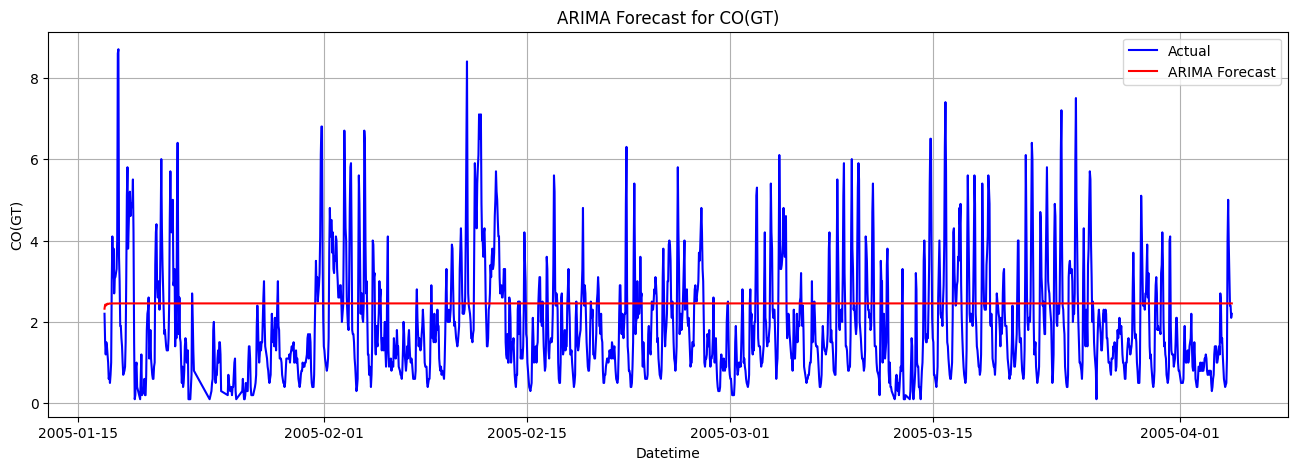

In [155]:
plt.figure(figsize=(16, 5))

#plt.plot(y_co_train.index, y_co_train, label="Train")
plt.plot(y_co_test.index, y_co_test, label="Actual", color="blue")
plt.plot(y_co_test.index, forecast_co, label="ARIMA Forecast", color="red")

plt.title("ARIMA Forecast for CO(GT)")
plt.xlabel("Datetime")
plt.ylabel("CO(GT)")
plt.legend()
plt.grid(True)
plt.show()

In [156]:
future_steps = 24
future_forecast_co = best_arima_fitted_co.forecast(steps=future_steps)

print("Next 24-hour Forecast for CO:")
print(future_forecast_co)

Next 24-hour Forecast for CO:
2005-01-16 20:00:00    2.324494
2005-01-16 21:00:00    2.420872
2005-01-16 22:00:00    2.427145
2005-01-16 23:00:00    2.406157
2005-01-17 00:00:00    2.433796
2005-01-17 01:00:00    2.448248
2005-01-17 02:00:00    2.439257
2005-01-17 03:00:00    2.443787
2005-01-17 04:00:00    2.452137
2005-01-17 05:00:00    2.450374
2005-01-17 06:00:00    2.449833
2005-01-17 07:00:00    2.453059
2005-01-17 08:00:00    2.453458
2005-01-17 09:00:00    2.452729
2005-01-17 10:00:00    2.453609
2005-01-17 11:00:00    2.454153
2005-01-17 12:00:00    2.453869
2005-01-17 13:00:00    2.453997
2005-01-17 14:00:00    2.454289
2005-01-17 15:00:00    2.454244
2005-01-17 16:00:00    2.454219
2005-01-17 17:00:00    2.454326
2005-01-17 18:00:00    2.454346
2005-01-17 19:00:00    2.454321
Freq: h, Name: predicted_mean, dtype: float64


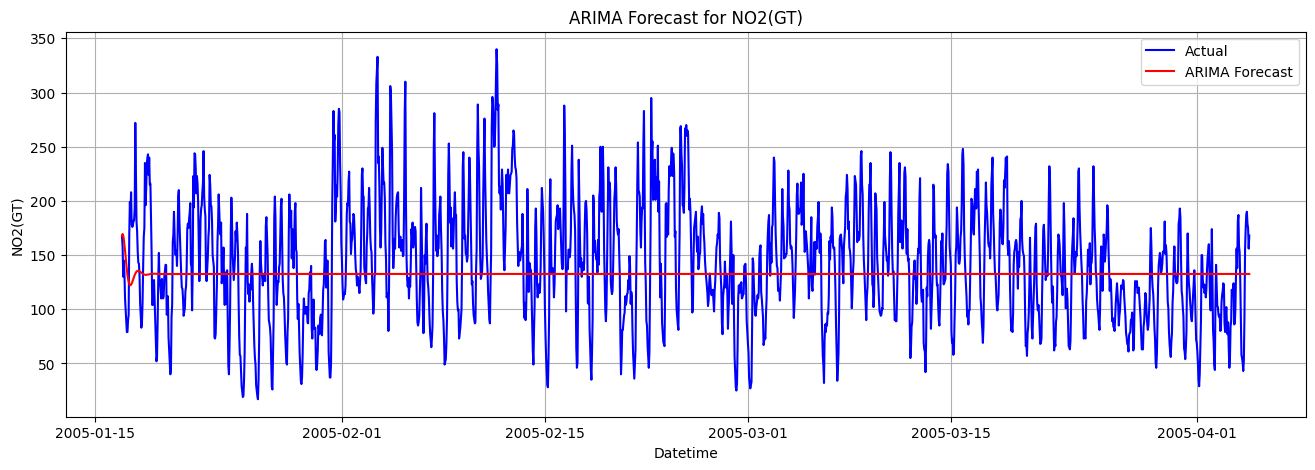

In [157]:
plt.figure(figsize=(16, 5))

#plt.plot(y_no2_train.index, y_no2_train, label="Train")
plt.plot(y_no2_test.index, y_no2_test, label="Actual", color="blue")
plt.plot(y_no2_test.index, forecast_no, label="ARIMA Forecast", color="red")

plt.title("ARIMA Forecast for NO2(GT)")
plt.xlabel("Datetime")
plt.ylabel("NO2(GT)")
plt.legend()
plt.grid(True)
plt.show()

In [158]:
future_steps = 24
future_forecast_no = best_arima_fitted_no2.forecast(steps=future_steps)

print("Next 24-hour Forecast for NO2:")
print(future_forecast_no)

Next 24-hour Forecast for NO2:
2005-01-16 20:00:00    167.846911
2005-01-16 21:00:00    169.508893
2005-01-16 22:00:00    168.076123
2005-01-16 23:00:00    164.592913
2005-01-17 00:00:00    159.720294
2005-01-17 01:00:00    154.025315
2005-01-17 02:00:00    148.012889
2005-01-17 03:00:00    142.115125
2005-01-17 04:00:00    136.679275
2005-01-17 05:00:00    131.961618
2005-01-17 06:00:00    128.127822
2005-01-17 07:00:00    125.258831
2005-01-17 08:00:00    123.360970
2005-01-17 09:00:00    122.378899
2005-01-17 10:00:00    122.210083
2005-01-17 11:00:00    122.719626
2005-01-17 12:00:00    123.754467
2005-01-17 13:00:00    125.156168
2005-01-17 14:00:00    126.771752
2005-01-17 15:00:00    128.462265
2005-01-17 16:00:00    130.108926
2005-01-17 17:00:00    131.616929
2005-01-17 18:00:00    132.917063
2005-01-17 19:00:00    133.965451
Freq: h, Name: predicted_mean, dtype: float64


## Deep Learning Model (GRU)

In [168]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import GRU
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

#### For CO(GT)

In [231]:
df3["CO(GT)"].shape

(9357,)

In [232]:
series_co = y_co_train.values.reshape(-1, 1) # ".values" Converts the pandas Series to a NumPy array. # .reshape(-1, 1) converts 1d array to 2d array for upcoming analysis
                                                # Because most ML libraries (TensorFlow/Keras, scikit-learn) work with NumPy arrays for efficiency

In [233]:
series_co.shape

(7466, 1)

In [234]:
scaler = MinMaxScaler() # For time series data the MinMax scaler is best choice. However, the standard scalar can be used. 
# log transformation can be used if the data contains no negative value. If the data contains negative value it is better to avoid log transformation.
series_scaled_co = scaler.fit_transform(series_co)

In [235]:
def create_sequences(data, window_size):
    X, Y = [], []  ## Initialize empty lists for features (X) and targets (y)
    for i in range(window_size, len(data)):    ## Start from 'window_size' because we need 'window_size' previous points
        X.append(data[i-window_size:i]) # # Features: Get previous 'window_size' points
        Y.append(data[i])  ## Target: Get the current point (what we want to predict)
    return np.array(X), np.array(Y) # Convert to NumPy arrays

In [236]:
window_size = 24 # window size can be low 6-12, medium 24-48 or large 72-120. for better model training the medium window size is better
X_co, Y_co = create_sequences(series_scaled_co, window_size)  #X → input sequences (past values) # Y → target values (next value)
print(X_co.shape, Y_co.shape) # x.shape = (9289, 24, 1)  # 9289 samples, 24 time steps, 1 feature; y.shape = (9289, 1)      # 9289 target values

(7442, 24, 1) (7442, 1)


In [237]:
split = int(0.8 * len(X_co))

X_co_train, X_co_test = X_co[:split], X_co[split:]
Y_co_train, Y_co_test = Y_co[:split], Y_co[split:]

In [238]:
model_co = Sequential([
    GRU(64, return_sequences=True, input_shape=(window_size, 1)),
    Dropout(0.2),
    GRU(32),
    Dropout(0.2),
    Dense(1)
])

model_co.compile(
    optimizer="adam",
    loss="mse"
)

model_co.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_12 (GRU)                         │ (None, 24, 64)              │          12,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 24, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_13 (GRU)                         │ (None, 32)                  │           9,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,305 (87.13 KB)

 Trainable params: 22,305 (87.13 KB)

 Non-trainable params: 0 (0.00 B)

In [239]:
history_co = model_co.fit(
    X_co_train,
    Y_co_train,
    validation_split=0.1,
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step - loss: 0.0069 - val_loss: 0.0080
Epoch 2/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0037 - val_loss: 0.0055
Epoch 3/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0032 - val_loss: 0.0054
Epoch 4/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0032 - val_loss: 0.0054
Epoch 5/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0030 - val_loss: 0.0054
Epoch 6/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0030 - val_loss: 0.0055
Epoch 7/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0030 - val_loss: 0.0055
Epoch 8/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0029 - val_loss: 0.0054
Epoch 9/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0029 - val_loss: 0.0053
Epoch 10/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0027 - val_loss: 0.0055
Epoch 11/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0028 - val_loss: 0.0058
Epoch 12/50
168/168 ━━━━━━━━━━━━━━━━━━━━

In [240]:
y_pred_gru_co = model_co.predict(X_co_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step


In [241]:
print(f' the predicted vlues : {y_pred_gru_co}')

 the predicted vlues : [[0.31172225]
 [0.25029892]
 [0.24832986]
 ...
 [0.1215039 ]
 [0.11090404]
 [0.12082928]]


In [242]:
y_pred_gru_co.shape

(1489, 1)

In [243]:
y_pred_gru_co_1d = y_pred_gru_co.flatten() # To make the GRU prediction to 1D which is originally 2d
y_pred_gru_co_1d.shape

(1489,)

In [244]:
X_co.min() # If there is no nan value in the data then the outcome will be 0.

np.float64(0.0)

#### For NO2(GT)

In [245]:
series_no = y_no2_train.values.reshape(-1, 1)

In [246]:
series_no.shape

(7466, 1)

In [247]:
scaler = MinMaxScaler()
series_scaled_no = scaler.fit_transform(series_no)

In [248]:
window_size = 24
X_no, Y_no = create_sequences(series_scaled_no, window_size)
print(X_no.shape, Y_no.shape) # x.shape = (9289, 24, 1)  # 9289 samples, 24 time steps, 1 feature; y.shape = (9289, 1)      # 9289 target values

(7442, 24, 1) (7442, 1)


In [249]:
split_1 = int(0.8 * len(X_no))

X_no_train, X_no_test = X_no[:split_1], X_no[split_1:]
Y_no_train, Y_no_test = Y_no[:split_1], Y_no[split_1:]

In [250]:
model_no = Sequential([
    GRU(64, return_sequences=True, input_shape=(window_size, 1)),
    Dropout(0.2),
    GRU(32),
    Dropout(0.2),
    Dense(1)
])

model_no.compile(
    optimizer="adam",
    loss="mse"
)

model_no.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_14 (GRU)                         │ (None, 24, 64)              │          12,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 24, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_15 (GRU)                         │ (None, 32)                  │           9,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,305 (87.13 KB)

 Trainable params: 22,305 (87.13 KB)

 Non-trainable params: 0 (0.00 B)

In [251]:
history_no = model_no.fit(
    X_no_train,
    Y_no_train,
    validation_split=0.1,
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 16s 47ms/step - loss: 0.0110 - val_loss: 0.0062
Epoch 2/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.0055 - val_loss: 0.0046
Epoch 3/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0044 - val_loss: 0.0042
Epoch 4/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.0039 - val_loss: 0.0036
Epoch 5/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.0039 - val_loss: 0.0037
Epoch 6/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 7/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 8/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.0035 - val_loss: 0.0036
Epoch 9/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 10/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 11/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.0033 - val_loss: 0.0039
Epoch 12/50
168/168 ━━━━━━━━━━━━━━━━━━━━

In [253]:
y_pred_gru_no = model_no.predict(X_no_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


In [254]:
print(f' the predicted vlues : {y_pred_gru_no}')

 the predicted vlues : [[0.629116  ]
 [0.5022048 ]
 [0.48712045]
 ...
 [0.43050942]
 [0.4529082 ]
 [0.47044384]]


In [255]:
y_pred_gru_no_1d = y_pred_gru_no.flatten() # To make the GRU prediction to 1D which is originally 2d
y_pred_gru_no_1d.shape

(1489,)

# 5. Model Evaluation
- Use appropriate metrics for forecasting:
  - Mean Absolute Error (MAE)
  - Root Mean Squared Error (RMSE)
  - Mean Absolute Percentage Error (MAPE)
- Plot actual vs. predicted values to visualize performance.


In [159]:
mae_co = mean_absolute_error(y_co_test, forecast_co)
rmse_co = np.sqrt(mean_squared_error(y_co_test, forecast_co))
mape_co = np.mean(np.abs((y_co_test - forecast_co) / y_co_test)) * 100

print("MAE for CO:", mae_co)
print("RMSE for CO:", rmse_co)
print("MAPE for CO:", mape_co)

MAE for CO: 1.259133293881432
RMSE for CO: 1.4909536379337864
MAPE for CO: 171.5122081870785


In [160]:
mae_no = mean_absolute_error(y_no2_test, forecast_no)
rmse_no = np.sqrt(mean_squared_error(y_no2_test, forecast_no))
mape_no = np.mean(np.abs((y_no2_test - forecast_no) / y_no2_test)) * 100

print("MAE for NO2:", mae_no)
print("RMSE for NO2:", rmse_no)
print("MAPE for NO2:", mape_no)

MAE for NO2: 43.65274055389649
RMSE for NO2: 54.954109767145674
MAPE for NO2: 39.65097209252695


In [165]:
CO_values = { 'MAE' : mae_co, 'RMSE' : rmse_co, 'MAPE' : mape_co }
NO2_values = { 'MAE' : mae_no, 'RMSE' : rmse_no, 'MAPE' : mape_no }

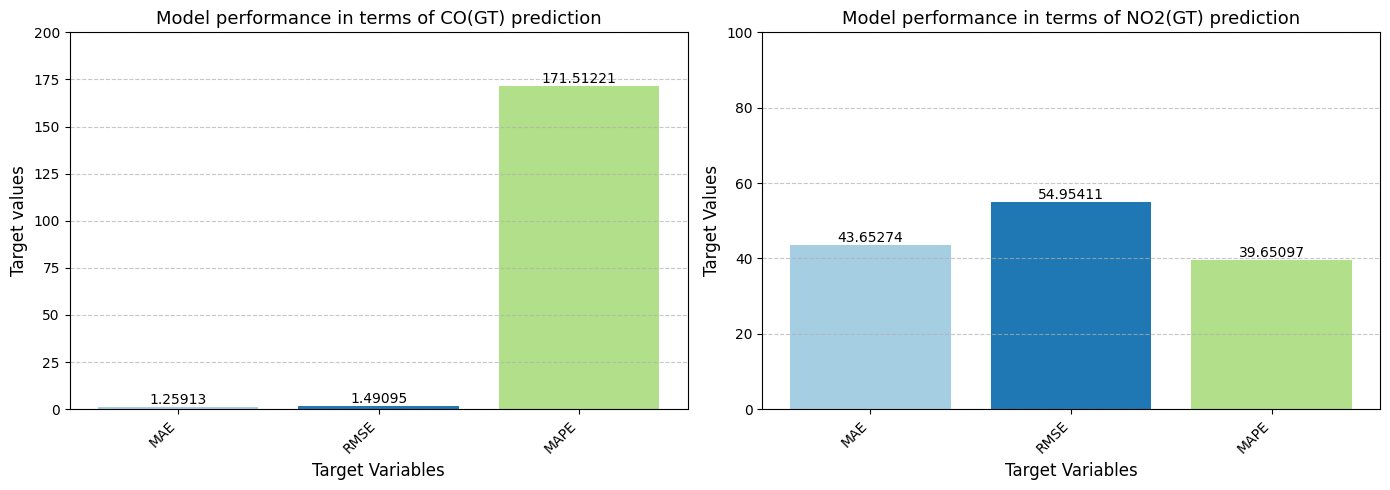

In [167]:
plt.figure(figsize=(14, 5))

plt.subplot(1,2,1) # Creates a grid of plots (1 row × 3 columns)
colors = plt.cm.Paired(np.arange(len(CO_values)))  # Used a colormap for different bar colors
bars = plt.bar(CO_values.keys(), CO_values.values(), color=colors)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.5f}', ha='center', va='bottom', fontsize=10)

plt.xlabel('Target Variables', fontsize=12)
plt.ylabel('Target values', fontsize=12)
plt.title('Model performance in terms of CO(GT) prediction', fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 200)  # Extend limit slightly above 1 for better visibility of text
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1,2,2)
colors = plt.cm.Paired(np.arange(len(NO2_values)))  # Used a colormap for different bar colors
bars = plt.bar(NO2_values.keys(), NO2_values.values(), color=colors)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.5f}', ha='center', va='bottom', fontsize=10)

plt.xlabel('Target Variables', fontsize=12)
plt.ylabel('Target Values', fontsize=12)
plt.title('Model performance in terms of NO2(GT) prediction', fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)  # Extend limit slightly above 1 for better visibility of text
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# 6. Visualization and Insights
- Generate forecasts for future dates and visualize the trends.
- Highlight seasonal patterns, peak times, and periods of concern.
- Provide actionable recommendations based on predicted trends.



In [256]:
min_len = min(
    len(y_co_test),
    len(forecast_co),
    len(rf_co_pred),
    len(y_pred_gru_co_1d)
)

y_true_aligned = y_co_test.iloc[-min_len:]
arima_aligned = forecast_co[-min_len:]
rf_aligned = rf_co_pred[-min_len:]
gru_aligned = y_pred_gru_co_1d[-min_len:]

In [257]:
def compare_models_plot(y_true, arima_pred, rf_pred, gru_pred, title):
    plt.figure(figsize=(15,6))

    plt.plot(y_true.index, y_true.values, label='Actual', linewidth=2)
    plt.plot(y_true.index, arima_pred, label='ARIMA', linestyle='--')
    plt.plot(y_true.index, rf_pred, label='Random Forest', linestyle='-.')
    plt.plot(y_true.index, gru_pred, label='GRU', linestyle=':')

    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('CO(GT)')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

In [258]:
# x_test_rf = x_test.reshape(x_test.shape[0], -1)

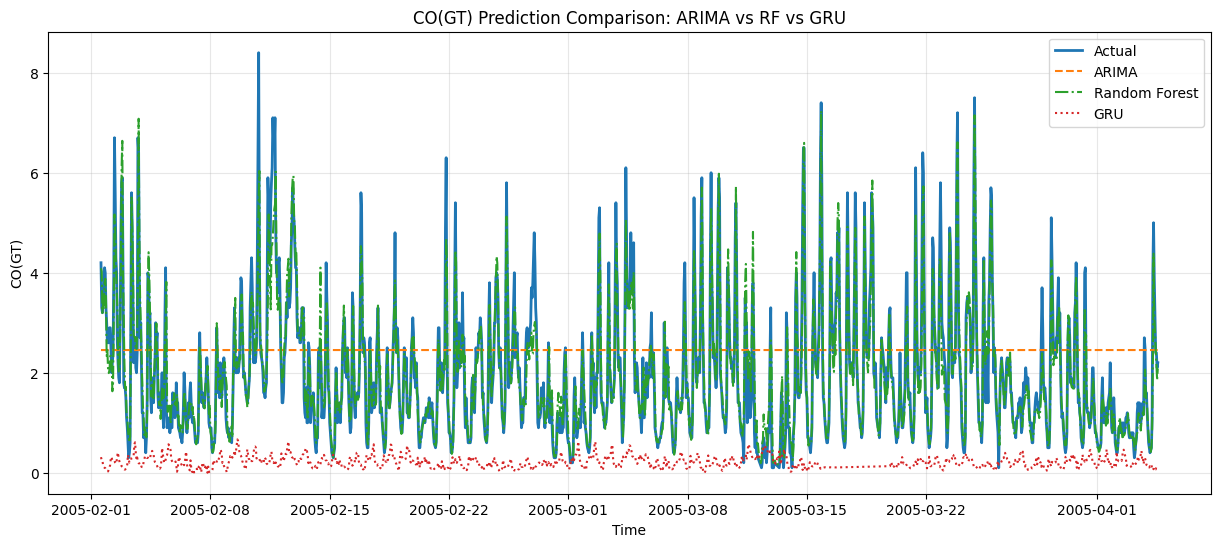

In [259]:
compare_models_plot(
    y_true_aligned,
    arima_aligned,
    rf_aligned,
    gru_aligned,
    title="CO(GT) Prediction Comparison: ARIMA vs RF vs GRU"
)

In [260]:
min_len_no = min(
    len(y_no2_test),
    len(forecast_no),
    len(rf_no2_pred),
    len(y_pred_gru_no_1d)
)

y_true_aligned_no = y_no2_test.iloc[-min_len_no:]
arima_aligned_no = forecast_no[-min_len_no:]
rf_aligned_no = rf_no2_pred[-min_len_no:]
gru_aligned_no = y_pred_gru_no_1d[-min_len_no:]

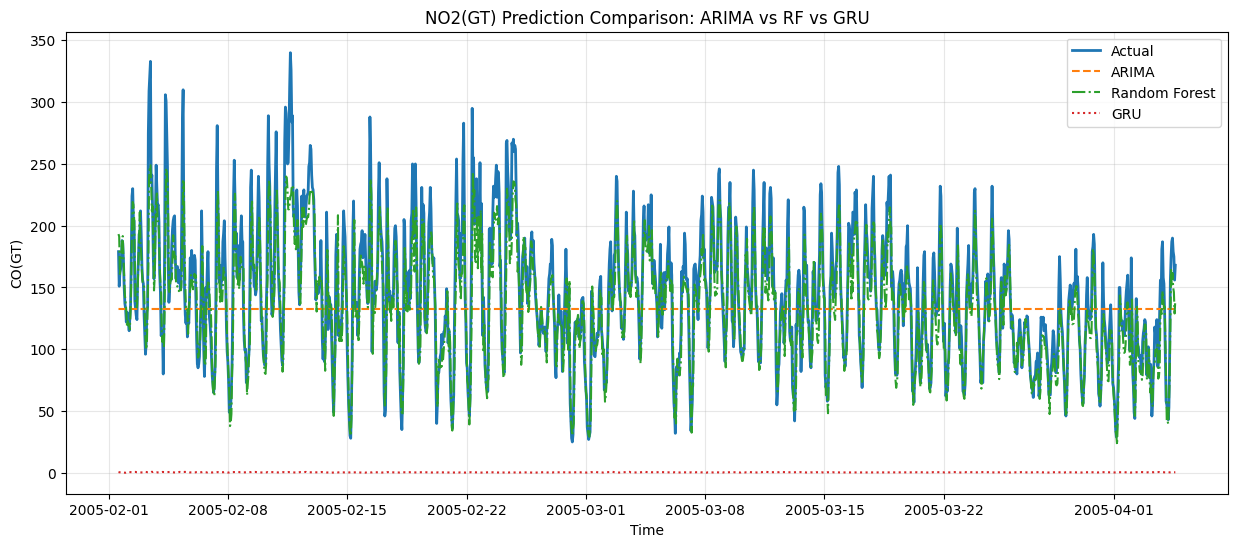

In [261]:
compare_models_plot(
    y_true_aligned_no,
    arima_aligned_no,
    rf_aligned_no,
    gru_aligned_no,
    title="NO2(GT) Prediction Comparison: ARIMA vs RF vs GRU"
)

# Comments on insights
- The Random Forest model performs best in capturing the rapid zigzag fluctuations of CO(GT), making it suitable for short-term forecasting but prone to overfitting noise.
- As Random Forest model learns non linear pattern it will be good for short term prediction. Therefore, it is best for capturing short term variability
- ARIMA gives very smooth predictions and looks almost like a straight line. This shows that it mainly learns the average trend of the data but cannot capture sudden rises and drops in CO levels.
- GRU is consistently predicting lower CO(GT) values than ARIMA. This may be due to the nature of models which focuses on learning pattern but not the average.
- In terms of NO2(GT) detection the RF model follows zigzag pattern like actual data and ARIMA model predicts the average like CO(GT) prediction.
- However, GRU model fails to learn the ups and downs like actual data in terms of NO2(GT) detection.
- In both cases for CO(GT) and NO2(GT) prediction the GRU model fails to learn the pattern and this may be due to low amount of training data. Because these neural models requires large amount of training data to recognize the learning pattern accurately.  
- In addition, Window size affect the model training to capture the broad pattern. Therefore, selection of window size during neural model is crucial.
- To see the prediction from the last datetime value we need to fit the arima model again with whole data set after training.
- If we do not fit the model with whole data set then the forecast will show from the last data set of the training data set.
- The AIC value reduced little bit after the auto detection of best p,d,q value by applying the autoarima model.
- Number of epoch imporves the learning of the model which was observed during training.
- Without handling the missing value or outliers the model showed poor performance which was observed during the project work. (data not shown).
- Exploratory data analysis shows a sesonal pattern for both CO(GT) and NO2(GT).